# Time-Frequency and Functional Connectivity Analysis
### Olaf Hauk, MRC Cognition and Brain Scienes Unit, University of Cambridge
### 26.1.2021

The following script was created for demo purposes only. Some bits are simplified, and some parameters were chosen to make effects easily visible. They may not be optimal for a real data set.
For more EEG/MEG tutorials in MNE-Python, see e.g. https://martinos.org/mne/stable/auto_tutorials/.
The script requires MNE-Python V0.22 and access to data on the CBU computing cluster. It can be modified to use the MEG datasets 'sample' and 'somato' (below).

# (MNE)-Python Preparation

In [47]:
# set paths
import sys

# figures within notebook
%matplotlib inline

# to keep copy of raw data
from copy import deepcopy

# for plotting
from matplotlib import pyplot as plt

# import numpy package
import numpy as np

# import MNE-Python tools
import mne

# MNE' Sample' dataset
meg_dir_sam = '/imaging/olaf/Workshop/MNE-sample-data/MEG/sample/'
# MNE 'Somato' dataset
meg_dir_som = '/imaging/olaf/Workshop/MNE-somato-data/sub-01/meg/'

# check MNE-Python version
print('MNE-Python version: %s.' % mne.__version__)

MNE-Python version: 0.22.0.


# Time-frequency analysis

In [48]:
# define somatosensory dataset
raw_fname_som = meg_dir_som + 'sub-01_task-somato_meg.fif'
event_id, tmin, tmax = 1, -1., 3.
baseline = (None, 0)
reject = dict(grad=4000e-13, eog=350e-6)

In [49]:
# Read raw data
raw_som = mne.io.Raw(raw_fname_som)
# get events from raw data
events_som = mne.find_events(raw_som, stim_channel='STI 014')
# Let's only look at gradiometers because it's quicker
picks = mne.pick_types(raw_som.info, meg='grad', eeg=False, eog=True, stim=False)


Opening raw data file /imaging/olaf/Workshop/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
111 events found
Event IDs: [1]


In [50]:
epochs_som = mne.Epochs(raw_som, events_som, event_id, tmin, tmax,
                    picks=picks, baseline=baseline, reject=reject)

Not setting metadata
Not setting metadata
111 matching events found
Setting baseline interval to [-0.9989760657919393, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [51]:
# Parameters for wavelet decomposition
freqs = np.arange(6, 30, 3)  # define frequencies of interest
n_cycles = freqs / 2.  # different number of cycle per frequency

In [52]:
power, itc = mne.time_frequency.tfr_morlet(epochs_som, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Loading data for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 bad epochs dropped


Applying baseline correction (mode: logratio)


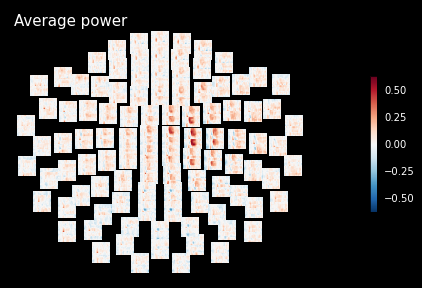

In [53]:
fig = power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')

Applying baseline correction (mode: logratio)


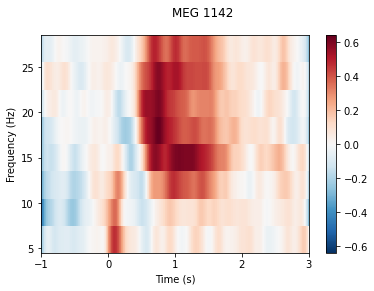

In [54]:
fig = power.plot([82], baseline=(-0.5, 0), mode='logratio')

Applying baseline correction (mode: logratio)


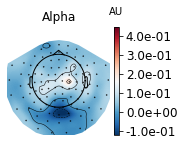

Applying baseline correction (mode: logratio)


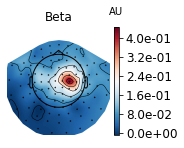

In [55]:
# Plot alpha and beta ranges
fig = power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio',
                   title='Alpha', vmax=0.45)
fig = power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio',
                   title='Beta', vmax=0.45)

# Phase-locking

In [56]:
# Read region-of-interest ("label")
fname_label = meg_dir_sam + '/labels/Aud-lh.label'
label = mne.read_label(fname_label)
# Filename for inverse operator
fname_inv = meg_dir_sam + 'sample_audvis-meg-oct-6-meg-inv.fif'
inverse_operator = mne.minimum_norm.read_inverse_operator(fname_inv)

reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
frequencies = np.arange(7, 30, 2)  # define frequencies of interest
n_cycles = frequencies / 3.  # different number of cycle per frequency

Reading inverse operator decomposition from /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing p

In [57]:
# Read raw data again
raw_fname_av = meg_dir_sam + 'sample_audvis_raw.fif'
raw_av = mne.io.read_raw_fif(raw_fname_av, preload=True)
events_av = mne.find_events(raw_av)
reject=dict(eeg=120e-6, eog=300e-6)
event_id = 1
tmin, tmax = -0.3, 0.5
baseline=(-0.2, 0.)
# Compute epochs
epochs = mne.Epochs(raw_av, events_av, event_id=event_id, tmin=tmin, tmax=tmax, baseline=baseline, reject=reject)

Opening raw data file /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated


In [58]:
# subtract the evoked response in order to exclude evoked activity
epochs_induced = epochs.copy().subtract_evoked()

Subtracting Evoked from Epochs
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 046', 'EEG 047', 'EEG 048']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003'

In [59]:
epochs.average()

    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 046', 'EEG 047', 'EEG 048']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 006', 'EEG 007', 'EEG 01

<Evoked | '1' (average, N=51), [-0.29969, 0.49949] sec, 366 ch, ~4.6 MB>

In [60]:
# compute power and phase-locking within label
power, phase_lock = mne.minimum_norm.source_induced_power(epochs, inverse_operator,
        frequencies, label, baseline=(-0.3, 0), baseline_mode='percent',
        n_cycles=n_cycles)

# Same for induced activity
power_ind, phase_lock_ind = mne.minimum_norm.source_induced_power(epochs_induced, inverse_operator,
        frequencies, label, baseline=(-0.3, 0), baseline_mode='percent',
        n_cycles=n_cycles)

Loading data for 72 events and 481 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 046', 'EEG 047', 'EEG 048']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 007']
    Rejecting  epoch based on EEG : ['E

In [61]:
# average power across epochs
power_avg = np.mean(power, axis=0)
power_ind_avg = np.mean(power_ind, axis=0)
phase_lock_avg = np.mean(phase_lock, axis=0)
phase_lock_ind_avg = np.mean(phase_lock_ind, axis=0)

Text(0.5, 1.0, 'Power Evoked+Induced')

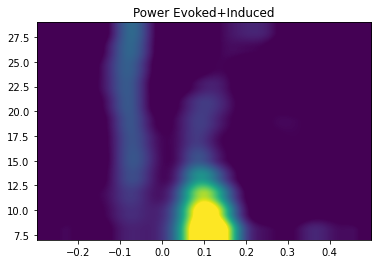

In [62]:
times = epochs.times
fig = plt.imshow(20 * power_avg,
               extent=[times[0], times[-1], frequencies[0], frequencies[-1]],
               aspect='auto', origin='lower', vmin=0., vmax=30.)
plt.title('Power Evoked+Induced')

Text(0.5, 1.0, 'Phase-locking Evoked+Induced')

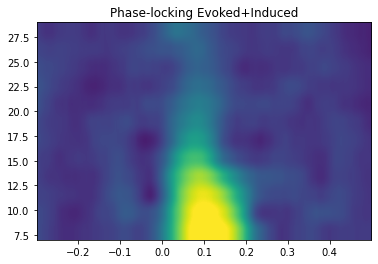

In [63]:
fig = plt.imshow(phase_lock_avg,
               extent=[times[0], times[-1], frequencies[0], frequencies[-1]],
               aspect='auto', origin='lower', vmin=0., vmax=.7)
plt.title('Phase-locking Evoked+Induced')

Text(0.5, 1.0, 'Power Induced')

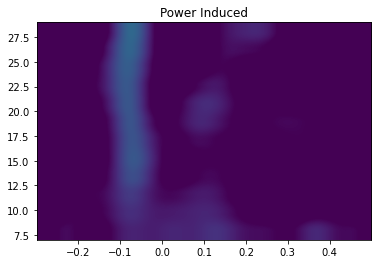

In [64]:
fig = plt.imshow(20 * power_ind_avg,
               extent=[times[0], times[-1], frequencies[0], frequencies[-1]],
               aspect='auto', origin='lower', vmin=0., vmax=30.)
plt.title('Power Induced')

Text(0.5, 1.0, 'Phase-locking Induced')

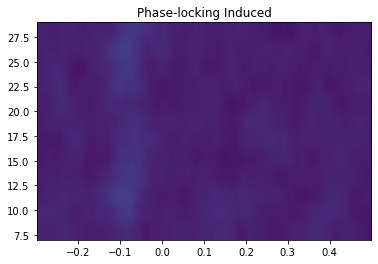

In [65]:
fig = plt.imshow(phase_lock_ind_avg,
               extent=[times[0], times[-1], frequencies[0], frequencies[-1]],
               aspect='auto', origin='lower', vmin=0., vmax=.7)
plt.title('Phase-locking Induced')

# Source Estimation on single trials

In [66]:
# Read new label
fname_label = meg_dir_sam + 'labels/Aud-lh.label'
label = mne.read_label(fname_label)

In [67]:
# Compute epochs again
epochs = mne.Epochs(raw_av, events_av, event_id=[1], tmin=tmin, tmax=tmax, baseline=baseline, reject=reject)
# create evoked data again
evoked = epochs.average()

Not setting metadata
Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 003', 'EEG 007', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 046', 'EEG 047', 'EEG 048']
    

In [68]:
# Apply inverse operator to EVOKED data
lambda2 = 0.1 # regularisation parameter
stc_evoked = mne.minimum_norm.apply_inverse(evoked, inverse_operator, lambda2=lambda2, method='MNE',
                           pick_ori="normal")
# get source time-courses within ROI/label
stc_evoked_label = stc_evoked.in_label(label)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 51
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
Applying inverse operator to "1"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  44.4% variance
[done]


In [69]:
# Apply inverse operator to EPOCHS
lambda2 = 1.  # regularisation parameter
stcs = mne.minimum_norm.apply_inverse_epochs(epochs, inverse_operator, lambda2=lambda2, method='dSPM', label=label,
                            pick_ori="normal", nave=evoked.nave, verbose=False)

Text(0.5, 1.0, 'Source time courses for one epoch for all vertices in label.')

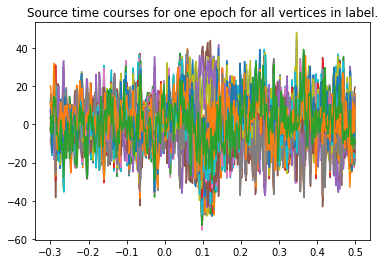

In [70]:
# plot time courses for one epoch in label
plt.plot(stcs[0].times, stcs[0].data.T)
plt.title('Source time courses for one epoch for all vertices in label.')

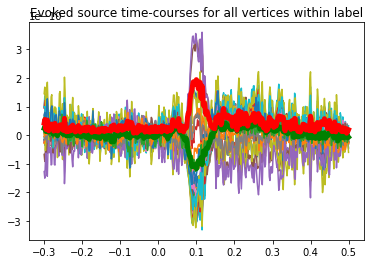

In [71]:
# plot evoked source time-courses for all vertices within label
plt.plot(stc_evoked_label.times, stc_evoked_label.data.T)
plt.title('Evoked source time-courses for all vertices within label')
# Note: change in "sign" even within label

# plot mean across vertices (taking into account the sign)
stc_evoked_mean = np.mean(stc_evoked_label.data, axis=0)
plt.plot(stc_evoked_label.times, stc_evoked_mean, 'g', linewidth=5)

# plot mean across vertices (take absolute values first)
stc_evoked_abs = np.mean(np.abs(stc_evoked_label.data), axis=0)
plt.plot(stc_evoked_label.times, stc_evoked_abs, 'r', linewidth=5)

# Functional Connectivity

In [72]:
subjects_dir = '/imaging/olaf/Workshop/MNE-sample-data/subjects'
fmin = 8.
fmax = 13.
sfreq = raw_av.info['sfreq']  # the sampling frequency
con_methods = ['pli', 'wpli2_debiased']

In [73]:
# Apply inverse operator to EPOCHS
lambda2 = 1.  # regularisation parameter
stcs = mne.minimum_norm.apply_inverse_epochs(epochs, inverse_operator, lambda2=lambda2, method='dSPM', 
                            pick_ori="normal", nave=evoked.nave, verbose=False)

In [74]:
# Get labels for FreeSurfer 'aparc' cortical parcellation with 34 labels/hemi
labels = mne.read_labels_from_annot('sample', parc='aparc',
                                    subjects_dir=subjects_dir)
label_colors = [label.color for label in labels]

# Average the source estimates within each label using sign-flips to reduce
# signal cancellations, also here we return a generator
src = inverse_operator['src']
label_ts = mne.extract_label_time_course(stcs, labels, src, mode='mean_flip',
                                         return_generator=True)

Reading labels from parcellation...
   read 34 labels from /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/label/lh.aparc.annot
   read 34 labels from /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/label/rh.aparc.annot


In [75]:
con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(label_ts,
        method=con_methods, mode='multitaper', sfreq=sfreq, fmin=fmin,
        fmax=fmax, faverage=True, mt_adaptive=True)

Connectivity computation...
Extracting time courses for 68 labels (mode: mean_flip)
only using indices for lower-triangular matrix
    computing connectivity for 2278 connections
    using t=0.000s..0.799s for estimation (481 points)
    frequencies: 8.7Hz..12.5Hz (4 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI, Debiased WPLI Square
    computing connectivity for epoch 1
Extracting time courses for 68 labels (mode: mean_flip)
    computing connectivity for epoch 2
Extracting time courses for 68 labels (mode: mean_flip)
    computing connectivity for epoch 3
Extracting time courses for 68 labels (mode: mean_flip)
    computing connectivity for epoch 4
Extracting time courses for 68 labels (mode: mean_flip)
    computing connectivity for epoch 5
Extracting time courses for 68 labels (mode: mean_flip)
    computing connectivity for epoch 6
Extracting time courses 

In [76]:
# con is a 3D array, get the connectivity for the first (and only) freq. band
# for each method
con_res = dict()
for method, c in zip(con_methods, con):
    con_res[method] = c[:,:, 0]

# First, we reorder the labels based on their location in the left hemi
label_names = [label.name for label in labels]

lh_labels = [name for name in label_names if name.endswith('lh')]

# Get the y-location of the label
label_ypos = list()
for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos.append(ypos)

# Reorder the labels based on their location
lh_labels = [label for (ypos, label) in sorted(zip(label_ypos, lh_labels))]

# For the right hemi
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

# Save the plot order and create a circular layout
node_order = list()
node_order.extend(lh_labels[::-1])  # reverse the order
node_order.extend(rh_labels)

node_angles = mne.viz.circular_layout(label_names, node_order, start_pos=90,
                              group_boundaries=[0, len(label_names) / 2])

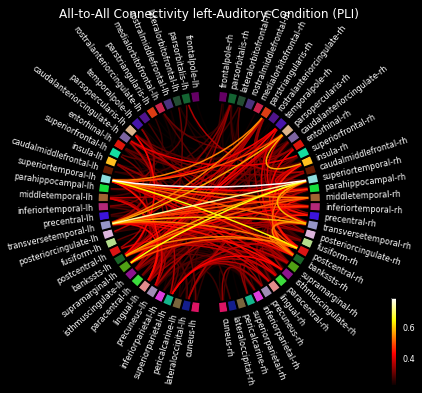

(<Figure size 576x576 with 2 Axes>,
 <PolarAxesSubplot:title={'center':'All-to-All Connectivity left-Auditory Condition (PLI)'}>)

In [77]:
mne.viz.plot_connectivity_circle(con_res['pli'], label_names, n_lines=300,
                         node_angles=node_angles, node_colors=label_colors,
                         title='All-to-All Connectivity left-Auditory '
                               'Condition (PLI)')

# Leakage

Adapted from: https://mne.tools/dev/auto_examples/inverse/plot_psf_ctf_label_leakage.html

In [78]:
from mne.minimum_norm import (make_inverse_resolution_matrix, get_point_spread)
from mne.viz import circular_layout, plot_connectivity_circle

# Compute resolution matrices for MNE
forward = mne.read_forward_solution(meg_dir_sam + 'sample_audvis-meg-oct-6-fwd.fif')
# Read inverse operator with fixed orientation constraint
inverse_operator = mne.minimum_norm.read_inverse_operator(
    meg_dir_sam + 'sample_audvis-meg-oct-6-meg-nodepth-fixed-inv.fif')
rm_mne = make_inverse_resolution_matrix(forward, inverse_operator,
                                        method='MNE', lambda2=1. / 3.**2)
src = inverse_operator['src']
del forward, inverse_operator  # save memory

Reading forward solution from /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
Reading inverse operator decomposition from /imaging/olaf/Workshop/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-nodepth-fixed-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
      

In [79]:
###############################################################################
# Read and organise labels for cortical parcellation
# --------------------------------------------------
#
# Get labels for FreeSurfer 'aparc' cortical parcellation with 34 labels/hemi
labels = mne.read_labels_from_annot('sample', parc='aparc',
                                    subjects_dir=subjects_dir)
n_labels = len(labels)
label_colors = [label.color for label in labels]
# First, we reorder the labels based on their location in the left hemi
label_names = [label.name for label in labels]
lh_labels = [name for name in label_names if name.endswith('lh')]

# Get the y-location of the label
label_ypos = list()
for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos.append(ypos)

# Reorder the labels based on their location
lh_labels = [label for (yp, label) in sorted(zip(label_ypos, lh_labels))]

# For the right hemi
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

Reading labels from parcellation...
   read 34 labels from /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/label/lh.aparc.annot
   read 34 labels from /imaging/olaf/Workshop/MNE-sample-data/subjects/sample/label/rh.aparc.annot


In [80]:
###############################################################################
# Compute point-spread function summaries (PCA) for all labels
# ------------------------------------------------------------
#
# We summarise the PSFs per label by their first five principal components, and
# use the first component to evaluate label-to-label leakage below.

# Compute first PCA component across PSFs within labels.
# Note the differences in explained variance, probably due to different
# spatial extents of labels.
n_comp = 5
stcs_psf_mne, pca_vars_mne = get_point_spread(
    rm_mne, src, labels, mode='pca', n_comp=n_comp, norm=None,
    return_pca_vars=True)
n_verts = rm_mne.shape[0]
del rm_mne

bankssts-lh: 73.2% [25.8 14.9 12.9 10.9  8.7]
bankssts-rh: 80.4% [26.8 19.4 17.6 11.7  5. ]
caudalanteriorcingulate-lh: 83.1% [39.9 18.4 13.   7.2  4.6]
caudalanteriorcingulate-rh: 79.3% [25.5 20.4 15.6  9.9  7.9]
caudalmiddlefrontal-lh: 67.1% [20.9 15.1 12.2 10.9  7.9]
caudalmiddlefrontal-rh: 63.8% [17.2 14.5 13.7 10.   8.4]
cuneus-lh: 75.4% [25.  16.1 15.  10.8  8.5]
cuneus-rh: 83.3% [29.9 23.1 17.8  8.   4.5]
entorhinal-lh: 91.6% [30.6 20.9 18.2 11.7 10.1]
entorhinal-rh: 98.4% [56.7 29.   8.2  3.5  1.1]
frontalpole-lh: 100.0% [55.8 31.9  6.7  5.   0.5]
frontalpole-rh: 98.7% [57.6 21.3 16.8  1.7  1.3]
fusiform-lh: 52.9% [12.2 11.7 11.   9.5  8.5]
fusiform-rh: 59.8% [17.1 14.5 11.3  9.9  6.9]
inferiorparietal-lh: 60.1% [16.8 14.3 11.8  9.3  8. ]
inferiorparietal-rh: 62.4% [17.9 13.8 11.7 10.8  8.2]
inferiortemporal-lh: 57.7% [16.7 14.8  9.7  8.6  7.9]
inferiortemporal-rh: 60.0% [16.3 13.3 11.6 10.1  8.6]
insula-lh: 67.3% [18.6 15.2 12.7 11.8  9. ]
insula-rh: 56.5% [14.3 12.8 11.6  9.4

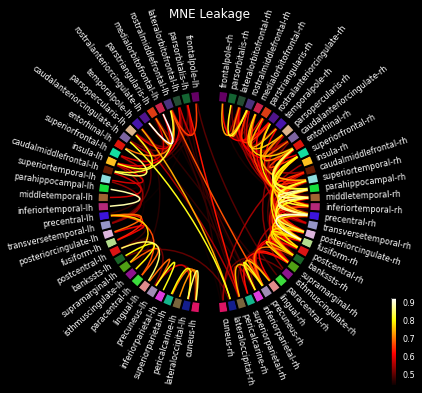

(<Figure size 576x576 with 2 Axes>,
 <PolarAxesSubplot:title={'center':'MNE Leakage'}>)

In [81]:
###############################################################################
# We can show the explained variances of principal components per label. Note
# how they differ across labels, most likely due to their varying spatial
# extent.

with np.printoptions(precision=1):
    for [name, var] in zip(label_names, pca_vars_mne):
        print(f'{name}: {var.sum():.1f}% {var}')

###############################################################################
# The output shows the summed variance explained by the first five principal
# components as well as the explained variances of the individual components.
#
# Evaluate leakage based on label-to-label PSF correlations
# ---------------------------------------------------------
#
# Note that correlations ignore the overall amplitude of PSFs, i.e. they do
# not show which region will potentially be the bigger "leaker".

# get PSFs from Source Estimate objects into matrix
psfs_mat = np.zeros([n_labels, n_verts])
# Leakage matrix for MNE, get first principal component per label
for [i, s] in enumerate(stcs_psf_mne):
    psfs_mat[i, :] = s.data[:, 0]
# Compute label-to-label leakage as Pearson correlation of PSFs
# Sign of correlation is arbitrary, so take absolute values
leakage_mne = np.abs(np.corrcoef(psfs_mat))

# Save the plot order and create a circular layout
node_order = lh_labels[::-1] + rh_labels  # mirror label order across hemis
node_angles = circular_layout(label_names, node_order, start_pos=90,
                              group_boundaries=[0, len(label_names) / 2])
# Plot the graph using node colors from the FreeSurfer parcellation. We only
# show the 200 strongest connections.
fig = plt.figure(num=None, figsize=(8, 8), facecolor='black')
plot_connectivity_circle(leakage_mne, label_names, n_lines=200,
                         node_angles=node_angles, node_colors=label_colors,
                         title='MNE Leakage', fig=fig)